## Time Series Exercises

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from vega_datasets import data

# set figure size

plt.rcParams["figure.figsize"] = (8,6)

**For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.**

**For this exercise you'll need to install a library that will provide us access to some more datasets:**

pip install vega_datasets

**You can use this library like so:**

from vega_datasets import data

data.sf_temps()

**You can use this library like so:**

from vega_datasets import data 

data.sf_temps()

**Use the above dataset for the exercises below:**

### Exercises I

1. Resample by the day and take the average temperature. Visualize the average temperature over time.
2. Write the code necessary to visualize the minimum temperature over time.
3. Write the code necessary to visualize the maximum temperature over time.
4. Which month is the coldest, on average?
5. Which month has the highest average temperature?
6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [2]:
# bring in the dataframe

df = data.sf_temps()

In [3]:
# look at data

df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [4]:
# check shape

df.shape

(8759, 2)

In [5]:
# info on dataframe - the data column is already in datatime format

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [6]:
# set date as index so we can be sure the data is in order

df = df.set_index('date').sort_index()

In [7]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


<AxesSubplot:xlabel='date'>

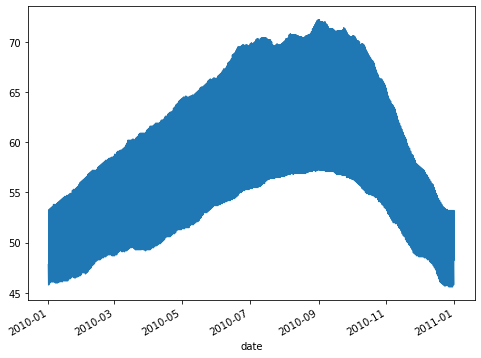

In [9]:
df.temp.plot()

In [10]:
# resample by day and get mean average

df.resample('D').mean().head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


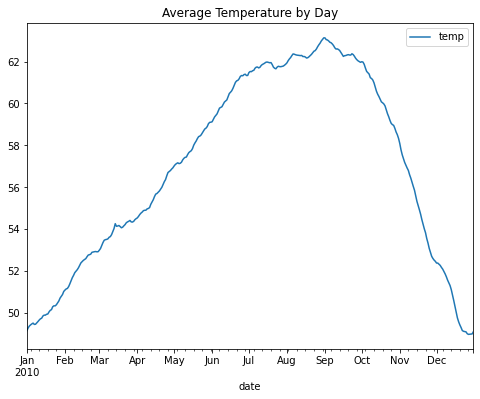

In [11]:
# now plot

df.resample('D').mean().plot()
plt.title('Average Temperature by Day');

### 2. Write the code necessary to visualize the minimum temperature over time.

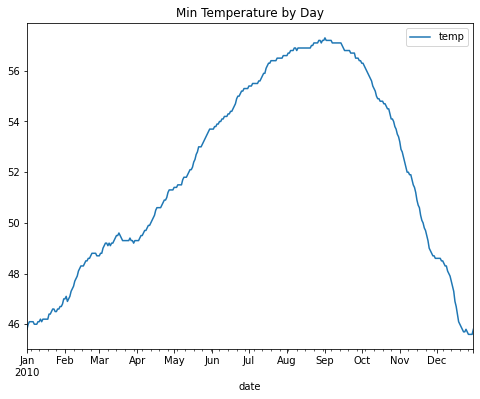

In [12]:
# resampling by day and using minimum temp of the day

df.resample('D').min().plot()
plt.title('Min Temperature by Day');

### 3. Write the code necessary to visualize the maximum temperature over time.

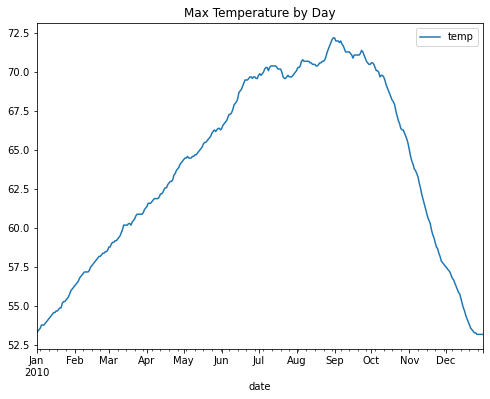

In [13]:
# resampling by day and using maximum temp of the day

df.resample('D').max().plot()
plt.title('Max Temperature by Day');

### 4. Which month is the coldest, on average?

In [14]:
# January is the coldest on average

df.resample('M').mean().sort_values(by='temp').head(1)

,temp
date,
2010-01-31,49.98414


In [15]:
df.resample('M').mean().idxmin()[0]

Timestamp('2010-01-31 00:00:00')

### 5. Which month has the highest average temperature?

In [16]:
# September is the hottest month on average

df.resample('M').mean().sort_values(by='temp').tail(1)

,temp
date,
2010-09-30,62.487083


In [17]:
df.resample('M').mean().idxmax()[0]

Timestamp('2010-09-30 00:00:00')

### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [18]:
hdt_df = df.temp.resample('D').agg(['min', 'max'])

hdt_df.head()

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [19]:
hdt_df['temp_diff'] = hdt_df['max'] - hdt_df['min']

hdt_df.head()

,min,max,temp_diff
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


In [20]:
# August has the highest daily temperature variability

hdt_df.resample('M').max().temp_diff.sort_values()

date
2010-12-31     8.9
2010-01-31     9.3
2010-02-28     9.9
2010-11-30    11.8
2010-03-31    12.0
2010-04-30    13.0
2010-05-31    13.1
2010-10-31    14.4
2010-06-30    14.8
2010-07-31    14.8
2010-09-30    14.9
2010-08-31    15.0
Name: temp_diff, dtype: float64

### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

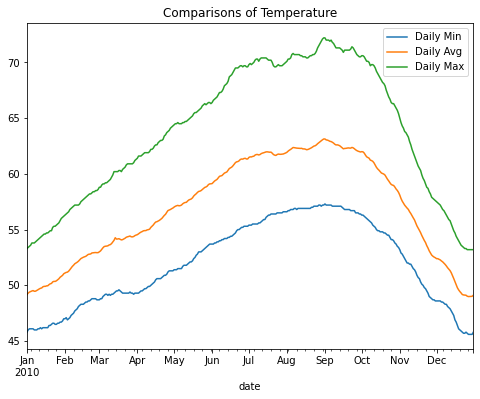

In [21]:
df.resample('D').min().temp.plot(label='Daily Min')
df.resample('D').mean().temp.plot(label='Daily Avg')
df.resample('D').max().temp.plot(label='Daily Max')
plt.title('Comparisons of Temperature')
plt.legend();

### Exercises II

Using: data.seattle_weather()

1. Which year and month combination has the highest amount of precipitation?
2. Visualize the amount of monthly precipitation over time.
3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.
4. Which year-month combination is the windiest?
5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
6. In which month does it rain the most?
7. Which month has the most number of days with a non-zero amount of precipitation?

In [22]:
df = data.seattle_weather()

In [23]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [24]:
df.shape

(1461, 6)

**1. Which year and month combination has the highest amount of precipitation?**

In [25]:
# set date as index so we can be sure the data is in order

df = df.set_index('date').sort_index()

In [26]:
# March 2012 has the highest amount of precipitation on average

df.resample('M').sum().precipitation.sort_values().tail(5)

date
2012-03-31    183.0
2012-11-30    210.5
2015-11-30    212.6
2014-03-31    240.0
2015-12-31    284.5
Name: precipitation, dtype: float64

**2. Visualize the amount of monthly precipitation over time.**

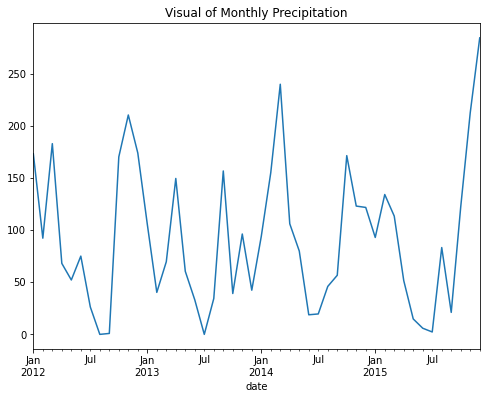

In [27]:
df.precipitation.resample('M').sum().plot()
plt.title('Visual of Monthly Precipitation');

**3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.**

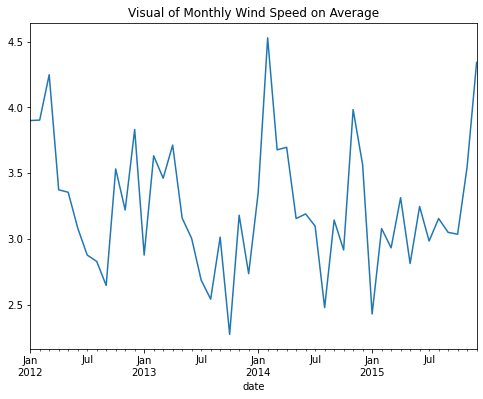

In [28]:
df.wind.resample('M').mean().plot()
plt.title('Visual of Monthly Wind Speed on Average');

**4. Which year-month combination is the windiest?**

In [29]:
# February 2014 appears to be the windiest month
# df.wind.resample('M').mean().sort_values().tail(1) # another way

df.resample('M').wind.mean().nlargest(1)

date
2014-02-28    4.528571
Freq: M, Name: wind, dtype: float64

**5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)**

In [30]:
# 2014 appears to be the sunniest year so far with 211 days of sun

sunny_df = df[df['weather']=='sun']
sunny_df.resample('Y').weather.count().nlargest()

date
2014-12-31    211
2013-12-31    205
2015-12-31    180
2012-12-31    118
Name: weather, dtype: int64

**6. In which month does it rain the most?**

In [31]:
# November 2012 appears to be the rainiest year with 25 days of rain

rainy_df = df[df['weather']=='rain']
rainy_df.resample('M').weather.count().nlargest()

date
2012-11-30    25
2012-12-31    23
2013-02-28    23
2012-03-31    19
2012-04-30    19
Name: weather, dtype: int64

In [32]:
# based off precipitation

df.resample('M').precipitation.sum().sort_values().nlargest()

date
2015-12-31    284.5
2014-03-31    240.0
2015-11-30    212.6
2012-11-30    210.5
2012-03-31    183.0
Name: precipitation, dtype: float64

**7. Which month has the most number of days with a non-zero amount of precipitation?**

In [33]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [34]:
# December of 2012 has the most number of days with non-zero precipitation with 27 days

precip_df = df[df['precipitation']>0]
precip_df.resample('M').precipitation.count().nlargest(1)

date
2012-12-31    27
Freq: M, Name: precipitation, dtype: int64

### Exercises III

Using: data.flights_20k()

1. Convert any negative delays to 0.
2. Which hour of the day has the highest average delay?
3. Does the day of the week make a difference in the delay amount?
4. Does the month make a difference in the delay amount?

In [35]:
# acquire dataframe

df = data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [37]:
# first things first, set date as index so we can be sure the data is in order

df = df.set_index('date').sort_index()

In [38]:
df.shape

(20000, 4)

**1. Convert any negative delays to 0.**

In [39]:
# df.mask(df[df['delay']<0].delay, 0)

In [40]:
# take a lookt at data with delay less than zero

df[df['delay']<0].delay

date
2001-01-01 06:30:00    -8
2001-01-01 07:00:00   -10
2001-01-01 07:05:00   -15
2001-01-01 07:15:00   -25
2001-01-01 07:45:00    -6
                       ..
2001-03-31 20:05:00   -12
2001-03-31 20:30:00   -11
2001-03-31 21:05:00    -5
2001-03-31 21:05:00    -1
2001-03-31 21:30:00   -11
Name: delay, Length: 8482, dtype: int64

In [41]:
# create a function to conver negative delay to zero

def delay_to_zero(x):
    if x < 0:
        x = 0
    return x

In [42]:
# use the function on the dataframe

df.delay = df.delay.apply(delay_to_zero)

In [43]:
# another method is to use np.where

df.delay = np.where(df.delay < 0, 0, df.delay)

In [44]:
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


**2. Which hour of the day has the highest average delay?**

In [45]:
# create an hour column

df['hour'] = df.index.hour

df.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0
2001-01-01 06:20:00,0,491,BNA,MCI,6
2001-01-01 06:30:00,0,251,MDW,STL,6
2001-01-01 07:00:00,0,361,OAK,ONT,7
2001-01-01 07:00:00,0,303,MSY,HOU,7


In [46]:
# groupby hour to get the average delay per hour of the day
# 3rd hour of the day has highest average delay

df.groupby('hour').delay.mean().sort_values().tail()

hour
22     32.704607
23     65.353846
0     127.916667
1     170.000000
3     302.500000
Name: delay, dtype: float64

**3. Does the day of the week make a difference in the delay amount?**

In [47]:
# make a new column weekday

df['weekday'] = df.index.day_name()

In [48]:
df.head()

,delay,distance,origin,destination,hour,weekday
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday
2001-01-01 06:30:00,0,251,MDW,STL,6,Monday
2001-01-01 07:00:00,0,361,OAK,ONT,7,Monday
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday


In [49]:
# get the average delay by day of the week
# it appears theres a difference depending on the day of the week

df.groupby('weekday').delay.mean()

weekday
Friday       17.757596
Monday        7.165772
Saturday      8.431498
Sunday       10.413542
Thursday     12.821322
Tuesday       9.410866
Wednesday    11.032478
Name: delay, dtype: float64

<AxesSubplot:xlabel='weekday'>

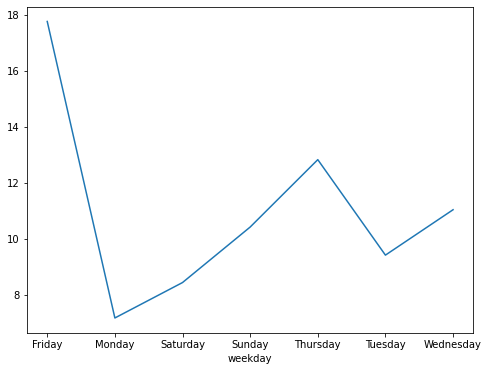

In [50]:
df.groupby('weekday').delay.mean().plot()

**4. Does the month make a difference in the delay amount?**

In [51]:
# make month column

df['month'] = df.index.month

# groupby month

df.groupby('month').delay.mean()

month
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64

<AxesSubplot:xlabel='month'>

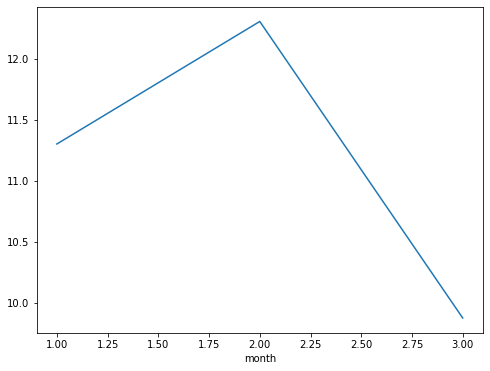

In [52]:
# very little difference depending on the month - plot looks more dramatic

df.groupby('month').delay.mean().plot()

### Bonus

from vega_datasets import data

data.iowa_electricity()

1. For each row, calculate the percentage of the year's total that energy source provided.
2. Lineplot of generation over time, color by source
3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)
4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?
5. Is the total generation increasing over time?
    
    5a. How would you control for increasing consumption over time when considering how much energy is coming from each source?
    
    5b. express each number as a % of the year's total
    
--------------------------   
   
Use the sf_temps dataset

1. Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)

2. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.

3. Create pretty labels for time plots

4. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

In [53]:
ie = data.iowa_electricity()

In [54]:
ie.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [55]:
ie.year = pd.to_datetime(ie.year, format='%Y-%m-%d')

**1. For each row, calculate the percentage of the year's total that energy source provided.**

In [56]:
ie = ie.pivot(index='year',columns='source')

In [57]:
ie

net_generation                          
source       Fossil Fuels Nuclear Energy Renewables
year                                               
2001-01-01          35361           3853       1437
2002-01-01          35991           4574       1963
2003-01-01          36234           3988       1885
2004-01-01          36205           4929       2102
2005-01-01          36883           4538       2724
2006-01-01          37014           5095       3364
2007-01-01          41389           4519       3870
2008-01-01          42734           5282       5070
2009-01-01          38620           4679       8560
2010-01-01          42750           4451      10308
2011-01-01          39361           5215      11795
2012-01-01          37379           4347      14949
2013-01-01          34873           5321      16476
2014-01-01          35250           4152      17452
2015-01-01          32319           5243      19091
2016-01-01          28437           4703      21241
2017-01-01          29329           5214      21933

In [58]:
ie.columns=['fossil_fuels','nuclear_energy','renewables']

In [59]:
ie.head()

,fossil_fuels,nuclear_energy,renewables
year,,,
2001-01-01,35361,3853,1437
2002-01-01,35991,4574,1963
2003-01-01,36234,3988,1885
2004-01-01,36205,4929,2102
2005-01-01,36883,4538,2724


In [60]:
ie['total_energy'] = ie.fossil_fuels + ie.nuclear_energy + ie.renewables

In [61]:
ie.head()

,fossil_fuels,nuclear_energy,renewables,total_energy
year,,,,
2001-01-01,35361,3853,1437,40651
2002-01-01,35991,4574,1963,42528
2003-01-01,36234,3988,1885,42107
2004-01-01,36205,4929,2102,43236
2005-01-01,36883,4538,2724,44145


In [62]:
ie['fossil_fuel_percentage'] = (ie.fossil_fuels / ie.total_energy) *100
ie['nucleaer_energy_percentage'] = (ie.nuclear_energy / ie.total_energy) *100
ie['renewables_percentage'] = (ie.renewables / ie.total_energy) *100

In [63]:
ie.head()

,fossil_fuels,nuclear_energy,renewables,total_energy,fossil_fuel_percentage,nucleaer_energy_percentage,renewables_percentage
year,,,,,,,
2001-01-01,35361,3853,1437,40651,86.986790,9.478242,3.534968
2002-01-01,35991,4574,1963,42528,84.628950,10.755267,4.615783
2003-01-01,36234,3988,1885,42107,86.052200,9.471109,4.476690
2004-01-01,36205,4929,2102,43236,83.738089,11.400222,4.861689
2005-01-01,36883,4538,2724,44145,83.549666,10.279760,6.170574


**2. Lineplot of generation over time, color by source**

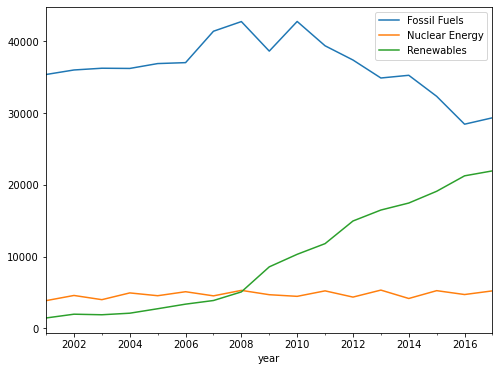

In [64]:
ie.fossil_fuels.plot(label='Fossil Fuels')
ie.nuclear_energy.plot(label='Nuclear Energy')
ie.renewables.plot(label='Renewables')
plt.legend()

**3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)**

In [65]:
ie.pivot_table(columns='year')

year,2001-01-01,2002-01-01,2003-01-01,2004-01-01,2005-01-01,2006-01-01,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01
fossil_fuel_percentage,86.986790,84.628950,86.052200,83.738089,83.549666,81.397753,83.147173,80.499567,74.471162,74.336191,69.824910,65.953242,61.536968,62.000915,57.047288,52.292161,51.931794
fossil_fuels,35361.000000,35991.000000,36234.000000,36205.000000,36883.000000,37014.000000,41389.000000,42734.000000,38620.000000,42750.000000,39361.000000,37379.000000,34873.000000,35250.000000,32319.000000,28437.000000,29329.000000
nucleaer_energy_percentage,9.478242,10.755267,9.471109,11.400222,10.279760,11.204451,9.078308,9.949893,9.022542,7.739658,9.251211,7.670049,9.389448,7.302916,9.254585,8.648241,9.232240
nuclear_energy,3853.000000,4574.000000,3988.000000,4929.000000,4538.000000,5095.000000,4519.000000,5282.000000,4679.000000,4451.000000,5215.000000,4347.000000,5321.000000,4152.000000,5243.000000,4703.000000,5214.000000
renewables,1437.000000,1963.000000,1885.000000,2102.000000,2724.000000,3364.000000,3870.000000,5070.000000,8560.000000,10308.000000,11795.000000,14949.000000,16476.000000,17452.000000,19091.000000,21241.000000,21933.000000
renewables_percentage,3.534968,4.615783,4.476690,4.861689,6.170574,7.397796,7.774519,9.550541,16.506296,17.924151,20.923879,26.376709,29.073584,30.696169,33.698127,39.059598,38.835966
total_energy,40651.000000,42528.000000,42107.000000,43236.000000,44145.000000,45473.000000,49778.000000,53086.000000,51859.000000,57509.000000,56371.000000,56675.000000,56670.000000,56854.000000,56653.000000,54381.000000,56476.000000


**4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?**

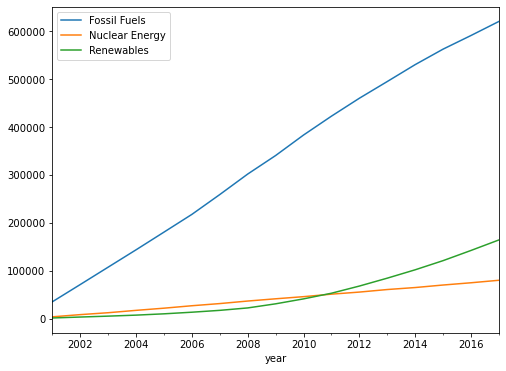

In [66]:
ie.fossil_fuels.cumsum().plot(label='Fossil Fuels')
ie.nuclear_energy.cumsum().plot(label='Nuclear Energy')
ie.renewables.cumsum().plot(label='Renewables')
plt.legend()

**5. Is the total generation increasing over time?**

<AxesSubplot:xlabel='year'>

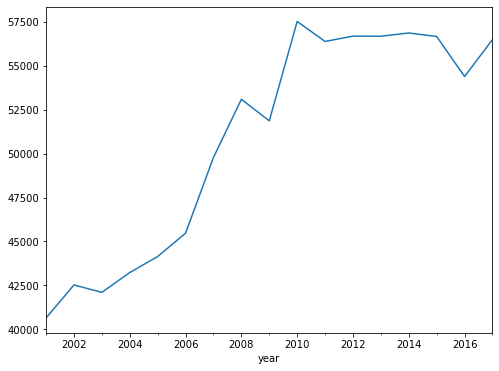

In [67]:
ie.total_energy.resample('Y').sum().plot()

**5a. How would you control for increasing consumption over time when considering how much energy is coming from each source?**

**5b. express each number as a % of the year's total**